In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import beta
import scipy
import seaborn as sns
import pandas as pd

In [12]:
matplotlib.style.use('fivethirtyeight')
pd.options.display.max_columns = 500 

%config InlineBackend.figure_format='retina'

In [13]:
def plot(a, b, trial, ctr):
    x = np.linspace(0, 1, 200)
    y = beta.pdf(x, a, b)
    mean = float(a) / (a + b)
    plt.figure(figsize=(4,4))
    plt.plot(x, y)
    plt.title("%s trials, true rate = %.1f, mean = %.2f" % (trial, ctr, mean), fontsize=20)
    plt.show()

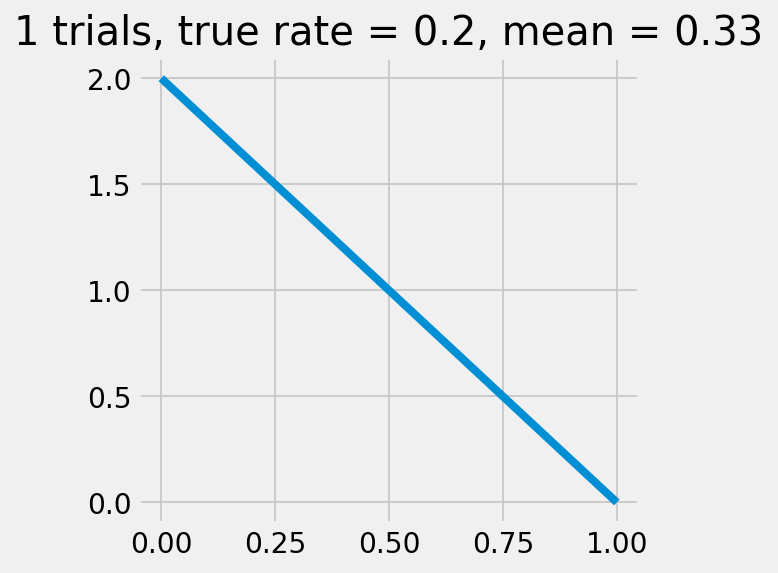

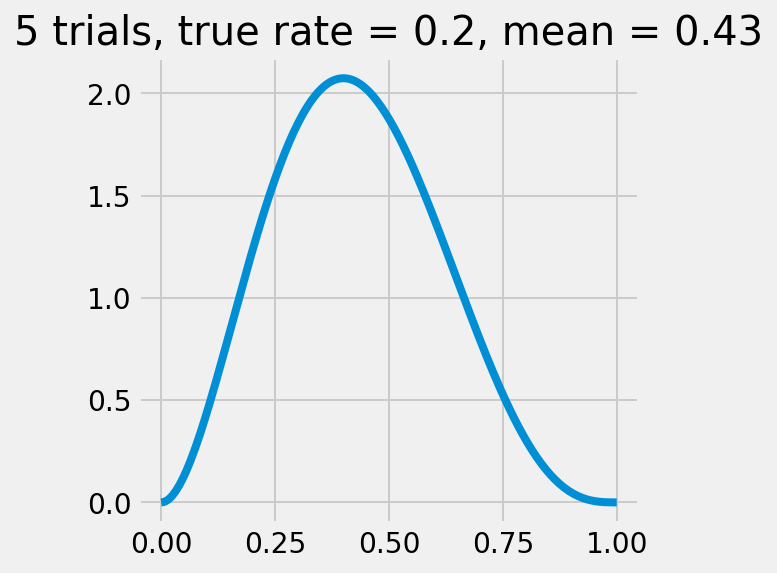

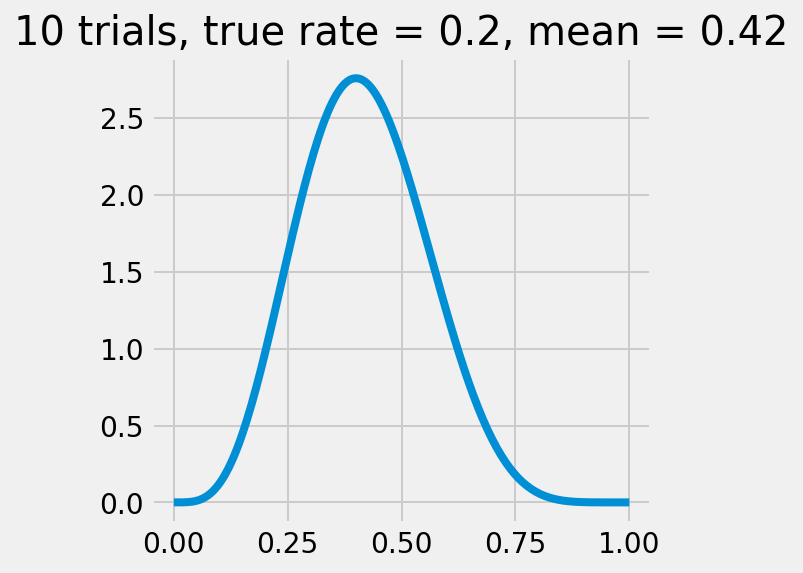

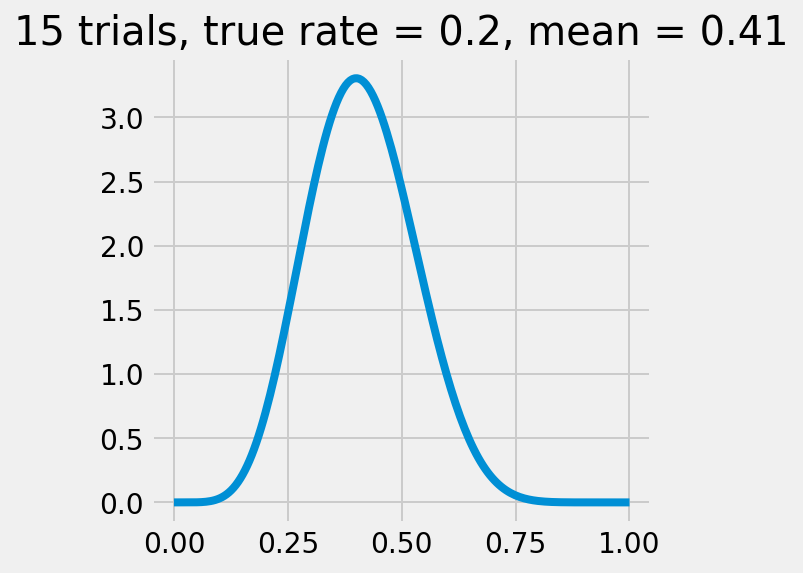

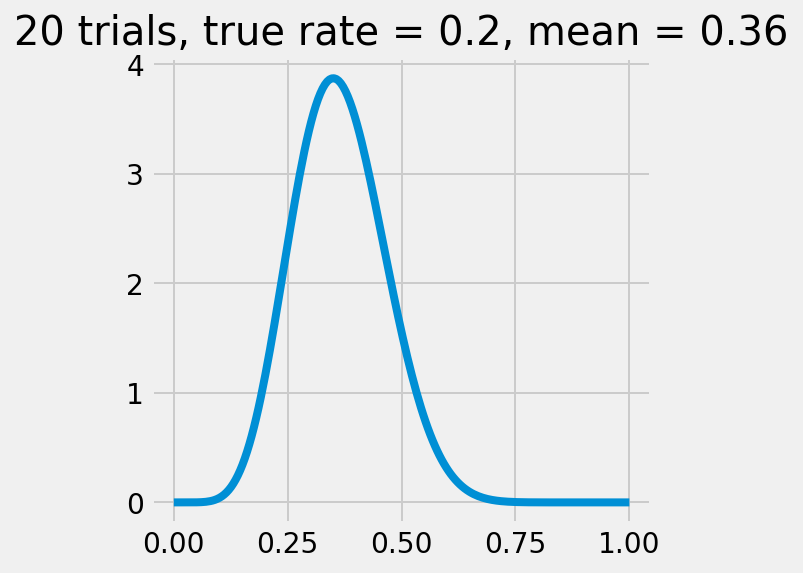

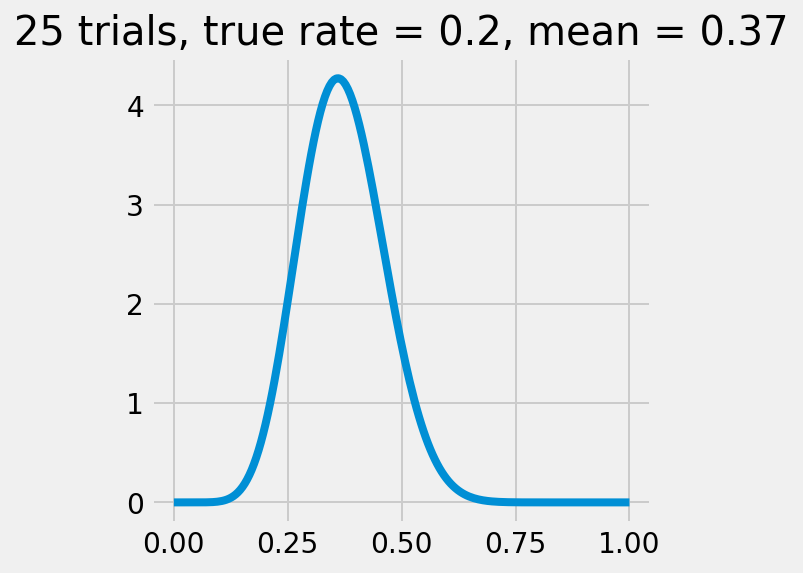

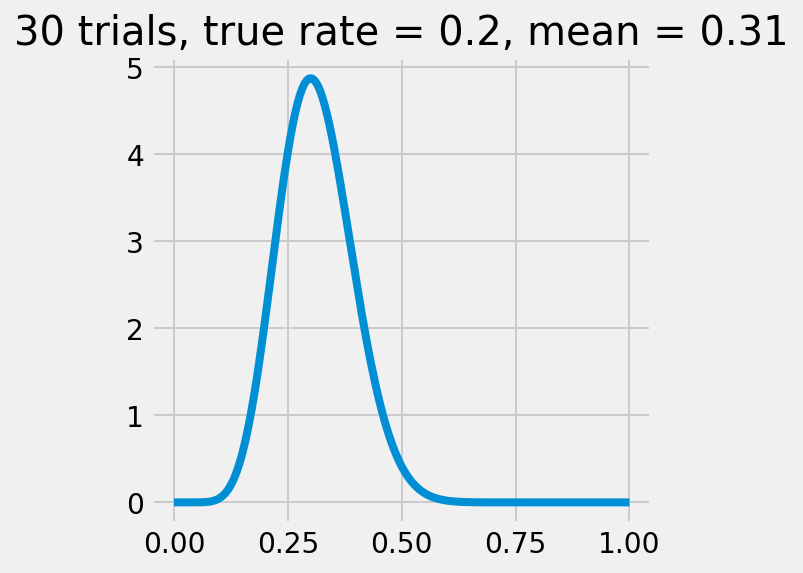

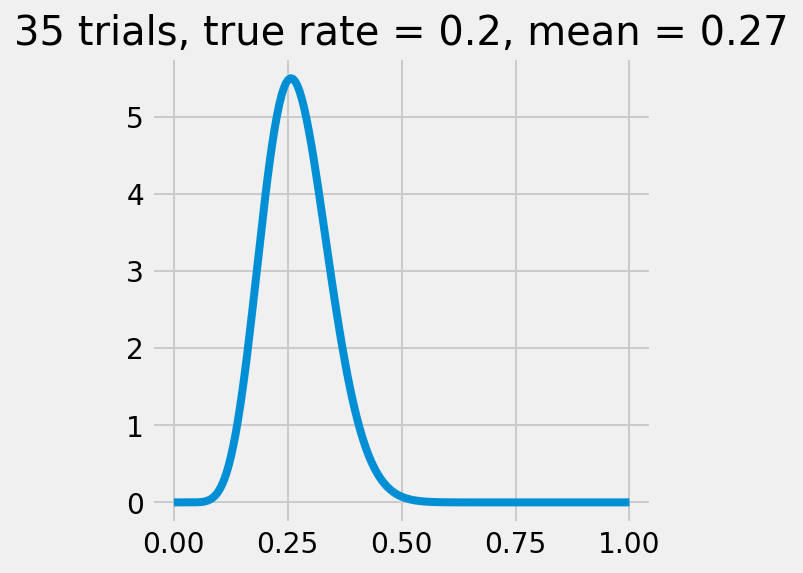

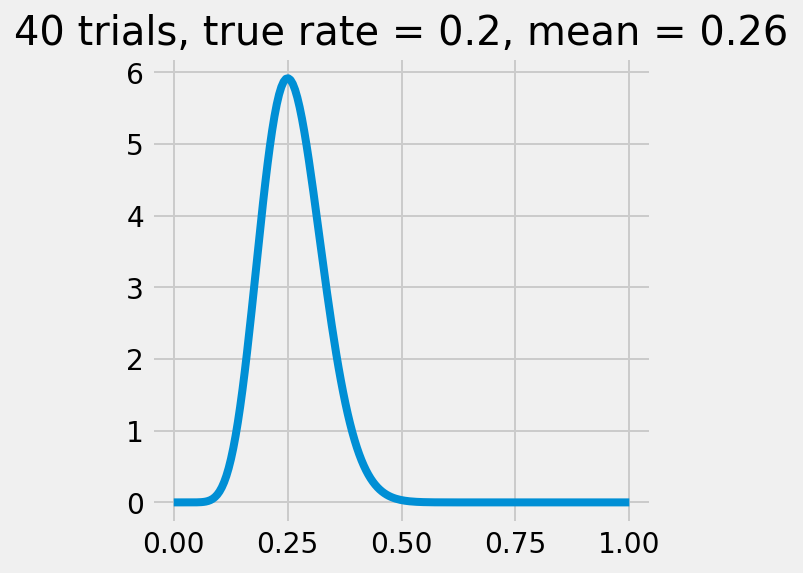

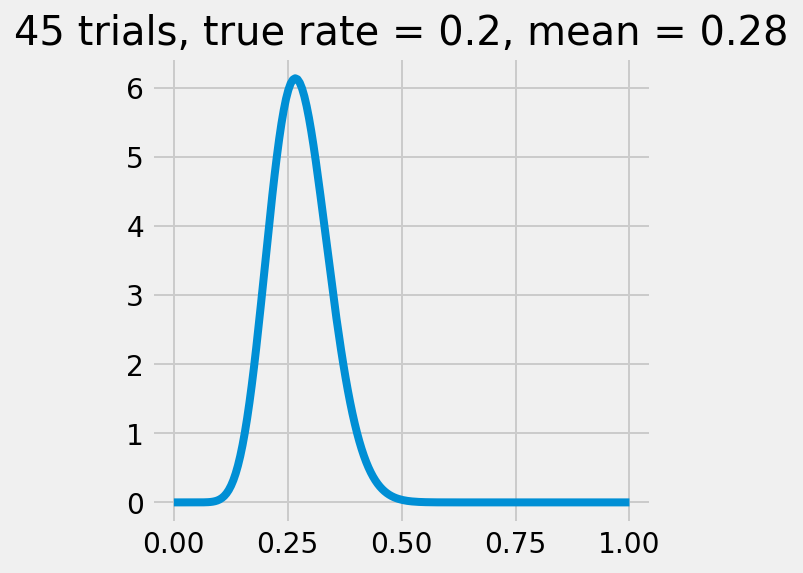

In [14]:
true_ctr = 0.24
a, b = 1, 1 # beta parameters
show = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for t in range(1, 50):
    coin_toss_result = (np.random.random() < true_ctr)
    if coin_toss_result:
        a += 1
    else:
        b += 1

    if t in show:
        plot(a, b, t, true_ctr)

# Variance Experiment

In [82]:
def test():
    breakpoint()

In [86]:
r = scipy.stats.bernoulli(p)

In [89]:
r.var()

0.09000000000000001

In [90]:
def bernoulli_experiment(p, samp_size=100, num_trials=10_000):
    r = scipy.stats.bernoulli(p)

    moment_names = ['mean', 'variance', 'skew', 'kurtosis', 'std']
    moments = scipy.stats.bernoulli.stats(p, moments='mvsk')
    moments = list(moments) + [r.std()]

    for m, mn in zip(moments, moment_names):
        print(mn, m)
        
    sums = []
    means = []
    for _ in range(0, num_trials):
        r_samp = r.rvs(size=samp_size)
        sums.append(r_samp.sum())
        means.append(r_samp.mean())

    
    # plt.figure(figsize=(7,4))
    fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(12,4))
    
    ax1.hist(sums, bins=25, edgecolor='black')
    ax1.set_title('Sums')
    ax1.set_xlabel('sum')
    ax1.set_ylabel('# trials')
    ax2.hist(means, bins=25, edgecolor='black')
    ax2.set_title('Means')
    ax2.set_xlabel('mean')


mean 0.1
variance 0.09000000000000001
skew 2.6666666666666665
kurtosis 5.111111111111111
std 0.30000000000000004


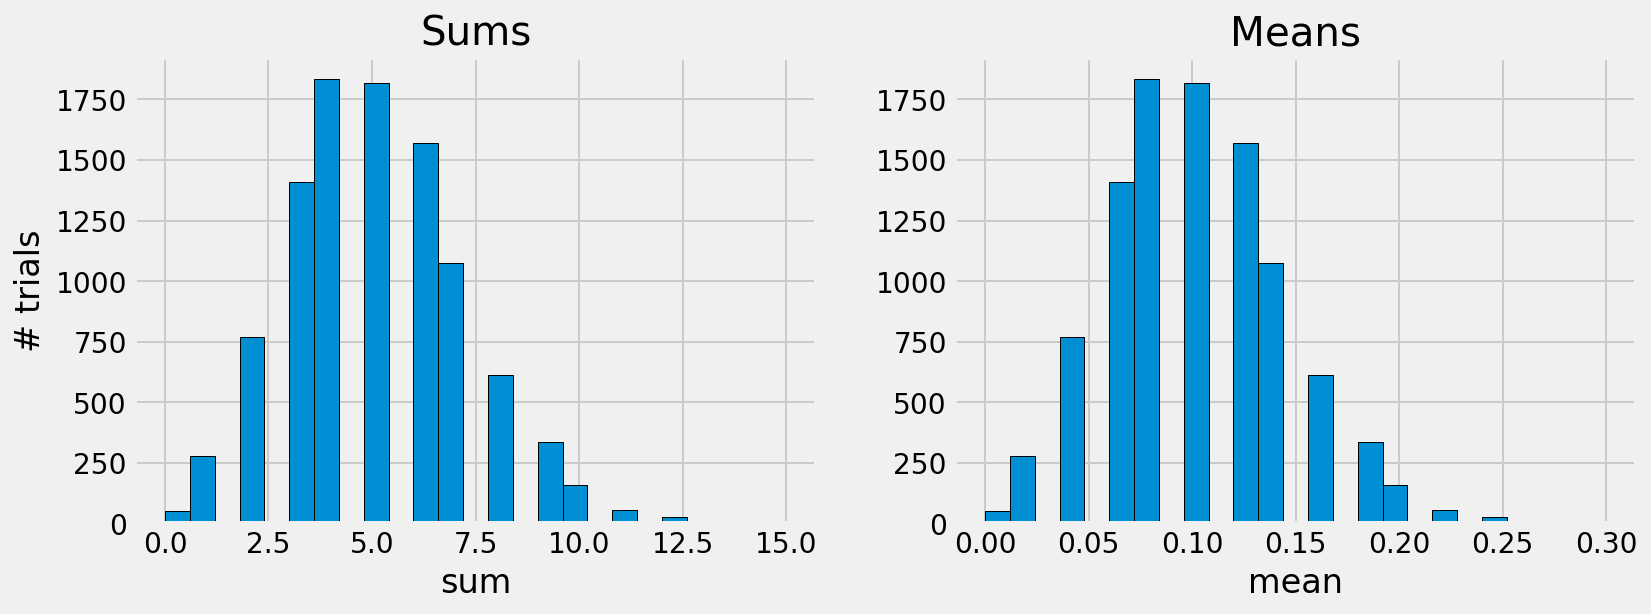

In [91]:
p = 0.1
bernoulli_experiment(p, samp_size=50, num_trials=10_000)

mean 0.3
variance 0.21
skew 0.8728715609439694
kurtosis -1.2380952380952381
std 0.458257569495584


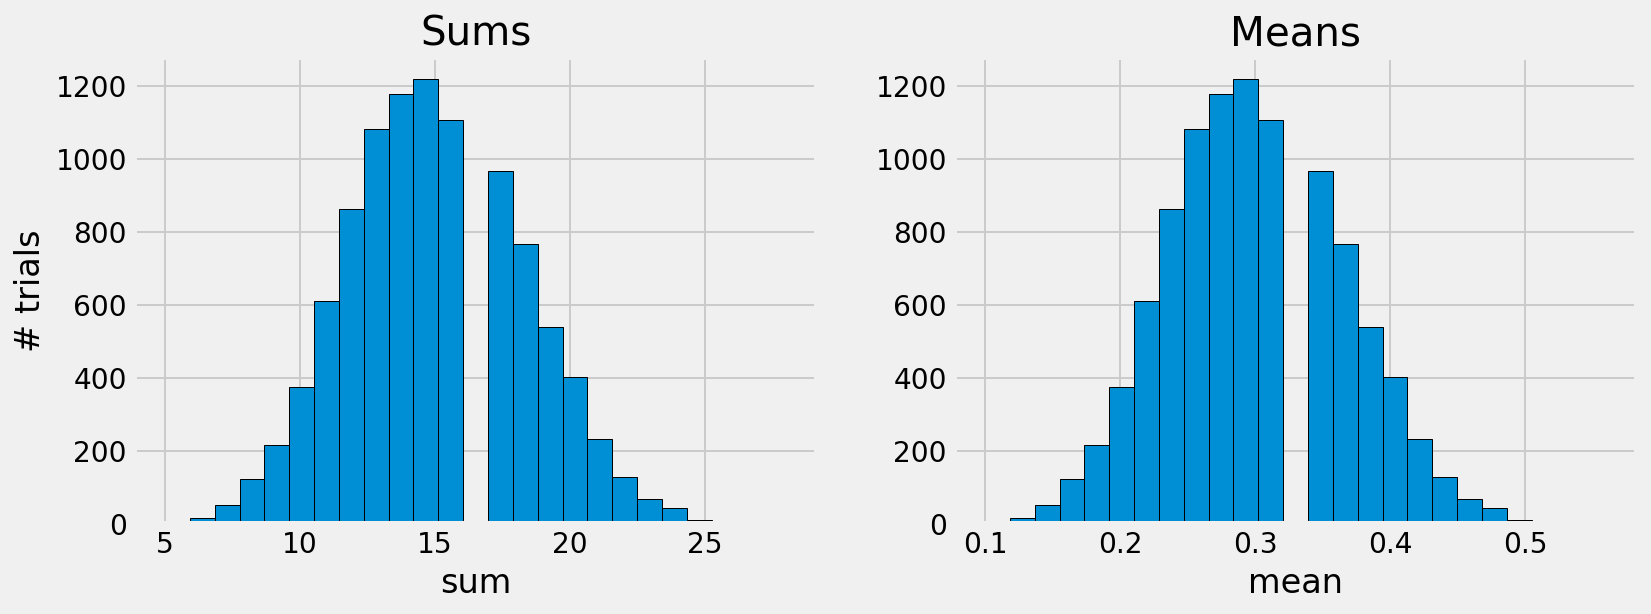

In [92]:
p = 0.3
bernoulli_experiment(p, samp_size=50, num_trials=10_000)

mean 0.5
variance 0.25
skew 0.0
kurtosis -2.0
std 0.5


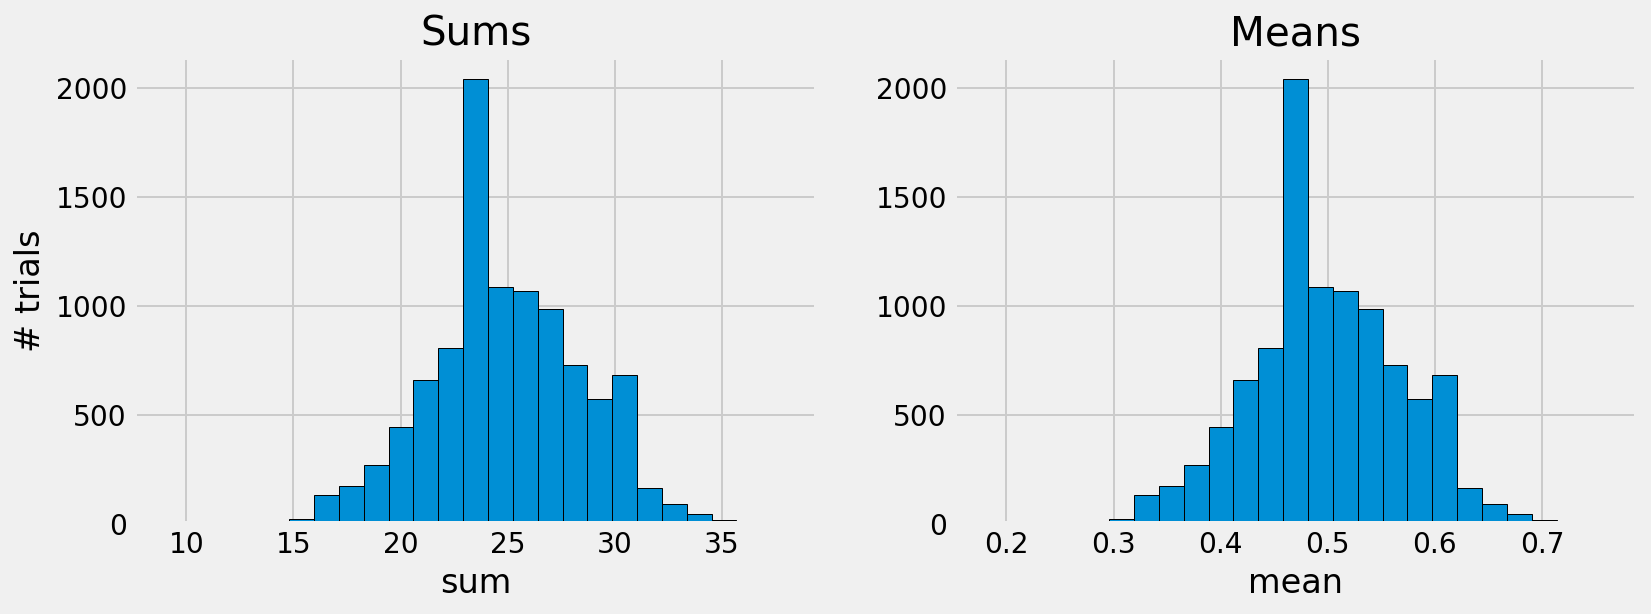

In [93]:
p = 0.5
bernoulli_experiment(p, samp_size=50, num_trials=10_000)

## Poison Binomial Investigation

In [126]:
p_list = np.array([0.1, 0.5])

In [127]:
mean_list = []
var_list = []
for p in p_list:
    mean, var, _, _ = scipy.stats.bernoulli.stats(p, moments='mvsk')
    mean_list.append(mean)
    var_list.append(var)

In [131]:
def pbinom_mean(p_list):
    return np.array(p_list).mean()


def pbinom_var(p_list):
    return ((1 - p_list) * p_list).mean()

In [132]:
print(pbinom_mean(p_list))

0.3


In [133]:
print(pbinom_var(p_list))

0.17


In [139]:
p_list = np.array(
    [0.26] * 100 +
    [0.3] * 0
)

print(pbinom_mean(p_list))
print(pbinom_var(p_list))

0.26
0.19240000000000002


In [135]:
p_list = np.array(
    [0.25] * 80 +
    [0.3] * 20
)

print(pbinom_mean(p_list))
print(pbinom_var(p_list))

In [141]:
p_list = np.array(
    [0.25] * 0 +
    [0.3] * 100
)

print(pbinom_mean(p_list))
print(pbinom_var(p_list))

0.3
0.21000000000000005


In [140]:
p_list = np.array(
    [0.25] * 80 +
    [0.5] * 20
)

print(pbinom_mean(p_list))
print(pbinom_var(p_list))

0.3
0.2


In [142]:
p_list = np.array([0.1, 0.5])

In [168]:

def p_binom_experiment(p_list, num_experiments=50, num_trials=50):

    sample_means = []
    for _ in range(0, num_experiments):
        samples = []
        for i in range(0, num_trials):
            p_ = np.random.choice(p_list)
            r = scipy.stats.bernoulli(p_)
            r_samp = r.rvs(size=1)
            samples.append(r_samp)
            
            
        sample_means.append(np.array(samples).mean())
            

    sample_means = np.array(sample_means)
            
    fig, (ax1) =  plt.subplots(1, 1, figsize=(6,4))
    
    print(sample_means.mean())
    print(sample_means.var())
    
    ax1.hist(sample_means, bins=20, edgecolor='black')
    ax1.set_title('Means')
    ax1.set_xlabel('mean')
    ax1.set_ylabel('# trials')


0.30279999999999996
0.0012921599999999999


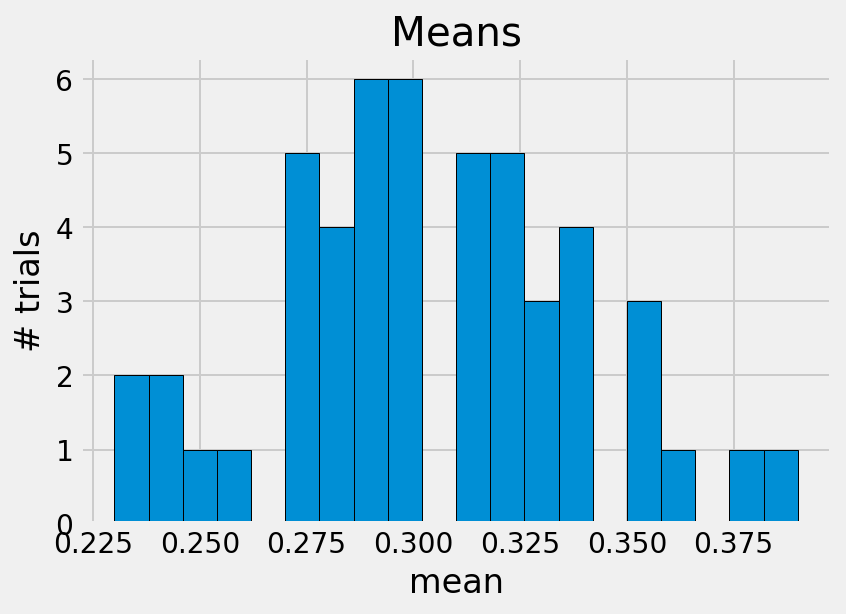

In [169]:
p_binom_experiment(p_list, num_experiments=50, num_trials=100)

0.2904
0.0021345066666666663


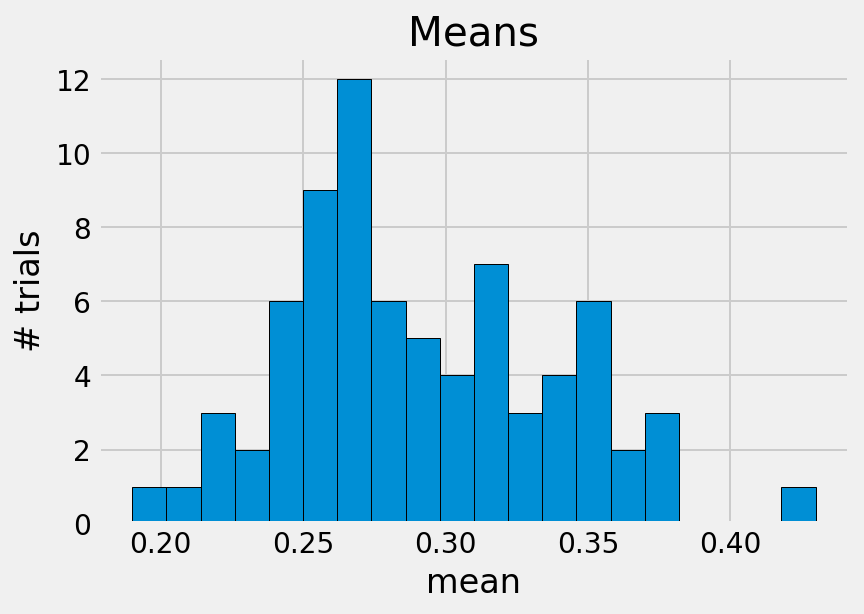

In [171]:
p_binom_experiment(p_list, num_experiments=75, num_trials=100)

0.29806666666666665
0.0015139288888888888


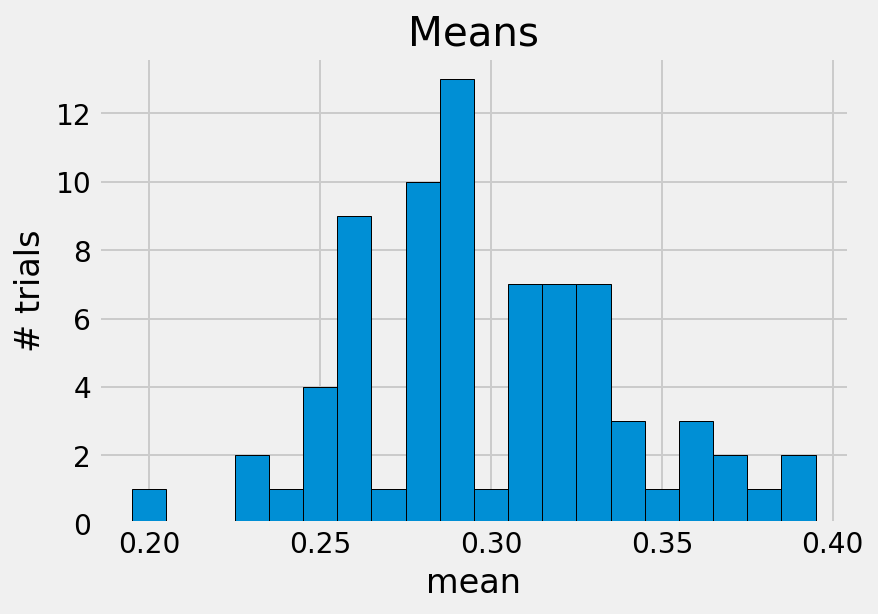

In [172]:
p_binom_experiment(p_list, num_experiments=75, num_trials=200)

In [98]:
(p_list - p_mean)**2

array([0.04, 0.04])

In [99]:
p_list

array([0.1, 0.5])

In [117]:
def 

<module 'scipy.stats' from '/Users/nathanieldake/development/data-science/intuitiveml/venv/lib/python3.9/site-packages/scipy/stats/__init__.py'>

## Appendix
### Variance of Bernoulli

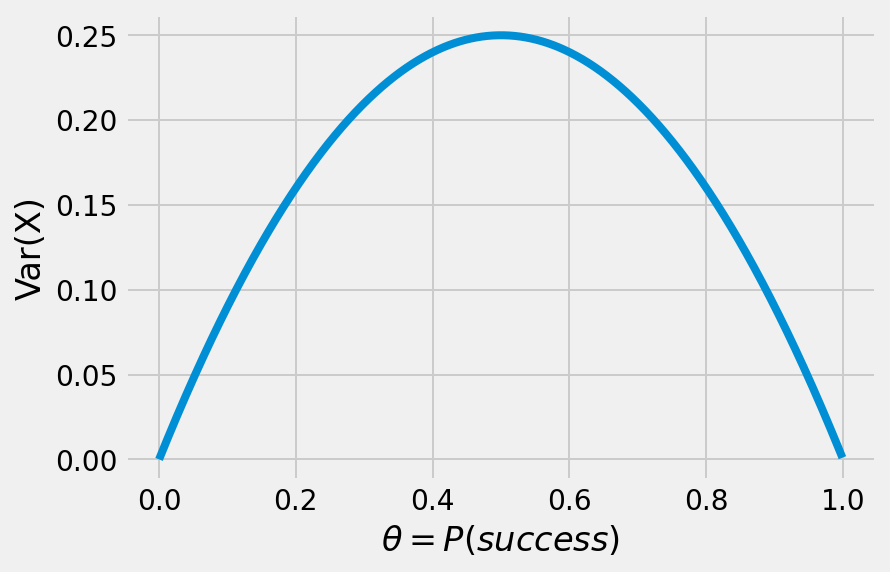

In [95]:
def var(mu, x):
    squared_deviation = (x - mu)**2
    p_x = np.array([1 - mu, mu])
    return sum(squared_deviation * p_x)


mu_list = np.arange(0, 1, 0.001)
x = np.array([0, 1])

var_list = []
for mu in mu_list:    
    var_list.append(var(mu, x))
    
plt.plot(mu_list, var_list)
plt.xlabel(r'$ \theta = P(success)$')
plt.ylabel('Var(X)')
plt.show()